In [1]:
# kaggle titanic의 경우 데이터 분석과 학습을 통한 생존자 예측 -> 회귀
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
train = pd.read_csv('./titanicData/train.csv')
test = pd.read_csv('./titanicData/test.csv')
gender_submission = pd.read_csv('./titanicData/gender_submission.csv')

print(train)
print(test)
print(gender_submission)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
train.info()
test.info()

# train -> Age, Cabin, Embarked null 존재
# test -> Age, Fare, Cabin, Embarked null 존재
# Sex의 경우 카테고리형 데이터이기 때문에 수치형으로 변환시켜야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
## 'Sex' 형변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# train_sex_result = le.fit_transform(train['Sex'])
train['Sex_numeric'] = le.fit_transform(train['Sex'])
# test_sex_result = le.fit_transform(test['Sex'])
test['Sex_numeric'] = le.fit_transform(test['Sex'])

In [5]:
print(train['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [6]:
# null값을 가장 많은 S로 치환해야함
train['Embarked'].fillna('S', inplace=True)

# train_embarked_result = le.fit_transform(train['Embarked'])
train['Embarked_numeric'] = le.fit_transform(train['Embarked'])
# test_embarked_result = le.fit_transform(test['Embarked'])
test['Embarked_numeric'] = le.fit_transform(test['Embarked'])
# embarked 수치형으로 변환

In [7]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
# 나이의 null값은 평균값으로 치환

In [8]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [9]:
mapping_num = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}

train['Cabin_site'] = train['Cabin'].str[:1]
# 맨 앞에가 알파벳이기 때문에 나머지를 빼고 Cabin_site에 저장
print(train['Cabin_site'].value_counts())
train['Cabin_site'] = train['Cabin_site'].map(mapping_num)
# 맵핑 넘버로 치환

Cabin_site
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


In [10]:
train['Cabin_site'] = train.groupby('Pclass')['Cabin_site'].transform('median')
print(train['Cabin_site'].value_counts())

Cabin_site
5.0    491
2.0    216
4.5    184
Name: count, dtype: int64


In [11]:
test['Cabin_site'] = test['Cabin'].str[:1]
# 맨 앞에가 알파벳이기 때문에 나머지를 빼고 Cabin_site에 저장
print(test['Cabin_site'].value_counts())
test['Cabin_site'] = test['Cabin_site'].map(mapping_num)
# 맵핑 넘버로 치환

Cabin_site
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: count, dtype: int64


In [12]:
test['Cabin_site'] = test.groupby('Pclass')['Cabin_site'].transform('median')
print(test['Cabin_site'].value_counts())

Cabin_site
5.0    311
2.0    107
Name: count, dtype: int64


In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Embarked_numeric,Cabin_site
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,5.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,5.0


In [14]:
train.loc[train['Age'] <= 10, 'Age_partition'] = 0
train.loc[(train['Age'] > 10) & (train['Age'] > 16), 'Age_partition'] = 1
train.loc[(train['Age'] > 16) & (train['Age'] > 20), 'Age_partition'] = 2
train.loc[(train['Age'] > 20) & (train['Age'] > 26), 'Age_partition'] = 3
train.loc[(train['Age'] > 26) & (train['Age'] > 30), 'Age_partition'] = 4
train.loc[(train['Age'] > 30) & (train['Age'] > 36), 'Age_partition'] = 5
train.loc[(train['Age'] > 36) & (train['Age'] > 40), 'Age_partition'] = 6
train.loc[(train['Age'] > 40) & (train['Age'] > 46), 'Age_partition'] = 7
train.loc[(train['Age'] > 46) & (train['Age'] > 50), 'Age_partition'] = 8
train.loc[(train['Age'] > 50) & (train['Age'] > 56), 'Age_partition'] = 9
train.loc[(train['Age'] > 56) & (train['Age'] > 60), 'Age_partition'] = 10
train.loc[train['Age'] > 60, 'Age_partition'] = 11

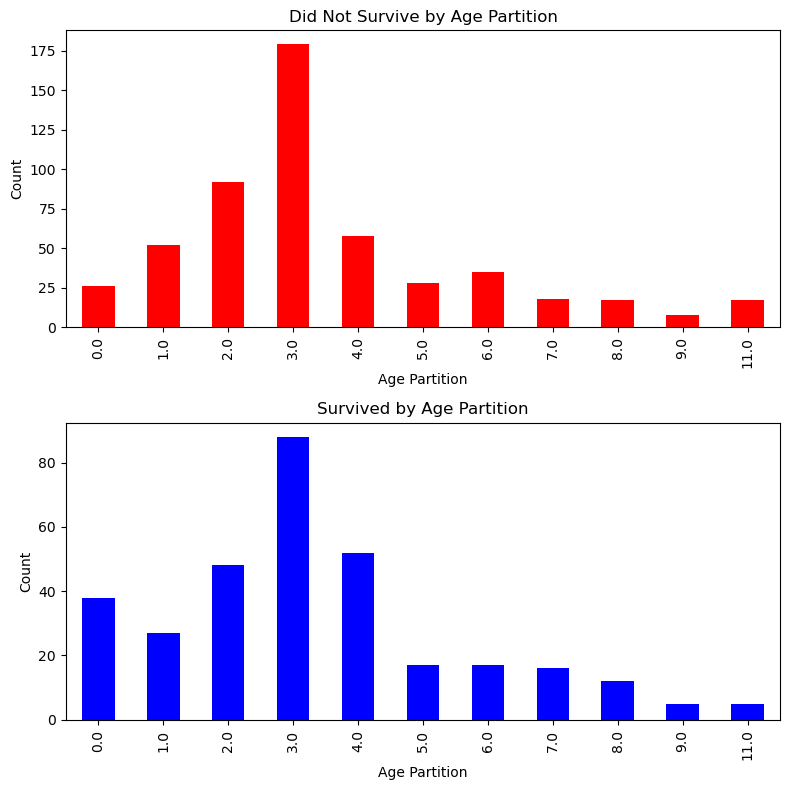

In [15]:
# 각 연령대별 생존자와 사망자 수 계산
age_survival_counts = train.groupby('Age_partition')['Survived'].value_counts().unstack().fillna(0)

# 'Did Not Survive'와 'Survived'를 각각 따로 추출
did_not_survive = age_survival_counts[0]
survived = age_survival_counts[1]

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Did Not Survive 그래프
did_not_survive.plot(kind='bar', ax=ax1, color='red', label='Did Not Survive')
ax1.set_xlabel('Age Partition')
ax1.set_ylabel('Count')
ax1.set_title('Did Not Survive by Age Partition')

# Survived 그래프
survived.plot(kind='bar', ax=ax2, color='blue', label='Survived')
ax2.set_xlabel('Age Partition')
ax2.set_ylabel('Count')
ax2.set_title('Survived by Age Partition')

plt.tight_layout()
plt.show()


In [52]:
from scipy.stats import f_oneway
# 두개 이상의 집단을 분석하기 위해 t-test말고 분산 분석을 사용

# 데이터 분할
group1 = train[train['Age_partition'].isin([0])]['Survived']
group2 = train[train['Age_partition'].isin([1])]['Survived']
group3 = train[train['Age_partition'].isin([2])]['Survived']
group4 = train[train['Age_partition'].isin([3])]['Survived']
group5 = train[train['Age_partition'].isin([4])]['Survived']
group6 = train[train['Age_partition'].isin([5])]['Survived']
group7 = train[train['Age_partition'].isin([6])]['Survived']
group8 = train[train['Age_partition'].isin([7])]['Survived']
group9 = train[train['Age_partition'].isin([8])]['Survived']
group10 = train[train['Age_partition'].isin([9])]['Survived']
group11 = train[train['Age_partition'].isin([10])]['Survived']
group11 = train[train['Age_partition'].isin([11])]['Survived']

In [61]:
f_statistic, p_value = f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11)

if p_value < 0.05:
    print(f'p-value : {p_value: 4f}, 연령 그룹 간의 생존률에 통계적으로 유의미한 차이가 있다.')
else:
    print(f'p-value : {p_value: 4f}, 연령 그룹 간의 생존률에 통계적으로 유의미한 차이가 없다.')

p-value :  0.005541, 연령 그룹 간의 생존률에 통계적으로 유의미한 차이가 있다.


In [92]:
train['Sex_numeric'].value_counts()
# 1이 남자 0이 여자

male_survived = train[train['Sex_numeric'] == 1]
female_survived = train[train['Sex_numeric'] == 0]

print(male_survived)
print(female_survived)

     PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    22.0      1  

In [98]:
# 표본 평균
male_sr = male_survived['Survived'].mean()
female_sr = female_survived['Survived'].mean()

print(male_sr)
print(female_sr)

0.18890814558058924
0.7420382165605095


In [103]:
# 표본 개수
male_n = len(male_survived['Survived'])
female_n = len(female_survived['Survived'])

print(male_n)
print(female_n)

577
314


In [112]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(male_survived['Survived'], female_survived['Survived'], equal_var=False)

if p_value < 0.05:  # 유의수준 0.05를 사용한 경우
    print("성별은 통계적으로 유의미한 차이가 있습니다.")
else:
    print("성별은 통계적으로 유의미한 차이가 없습니다.")

성별은 통계적으로 유의미한 차이가 있습니다.
